In [9]:
import numpy as np
import seaborn as sns
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

### ***Neurons for Vision***

The first, Flatten, isn’t a layer of neurons, but an input layer specification. Our
inputs are 28 × 28 images, but we want them to be treated as a series of numeric values.

The next one, Dense, is a layer of neurons, and we’re specifying that we want 128 of
them. This is the middle layer. You’ll often hear such layers described as hidden layers.
Layers that are between the inputs and the outputs aren’t seen by a caller, so the term
“hidden” is used to describe them. We’re asking for 128 neurons to have their internal
parameters randomly initialized. Often the question I’ll get asked at this point is
“Why 128?” This is entirely arbitrary—there’s no fixed rule for the number of neurons
to use. As you design the layers you want to pick the appropriate number of values to
enable your model to actually learn. More neurons means it will run more slowly, as it
has to learn more parameters. More neurons could also lead to a network that is great at
recognizing the training data, but not so good at recognizing data that it hasn’t previously
seen. On the other hand, fewer neurons' means that the model might not have sufficient
parameters to learn.

****note****

***The activation function is code that will execute on each neuron in the layer.
TensorFlow supports a number of them, but a very common one in middle layers is relu, which
stands for rectified linear unit. It’s a simple function that just returns a value if it’s
greater than 0. In this case, we don’t want negative values being passed to the next
layer to potentially impact the summing function, so instead of writing a lot of
if-then code, we can simply activate the layer with relu.***

The loss function in this case is called sparse categorical cross entropy, instead of us
trying to predict a single number, here we’re picking a category. Our item of clothing
will belong to 1 of 10 categories of clothing, and thus using a categorical loss function
is the way to go. Sparse categorical cross entropy is a good choice. The adam optimizer is
an evolution of the stochastic gradient descent (sgd) optimizer.

In [2]:
input_layer = Flatten(input_shape=(28, 28))
layer_1 = Dense(128, activation=tf.nn.relu)
output_layer = Dense(10, activation=tf.nn.softmax)

model = Sequential(layers=[input_layer, layer_1, output_layer])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Keras has a number of built-in datasets that you can access with a single line of code
like this. In this case you don’t have to handle downloading the 70,000 images—split‐
ting them into training and test sets, and so on—all it takes is one line of code. This
methodology has been improved upon using an API called TensorFlow Datasets, but
for the purposes of these early chapters, to reduce the number of new concepts you
need to learn, we’ll just use tf.keras.datasets.

In [3]:
mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

len(train_images), len(test_images)

4431872/4422102 [==============================] - 14s 3us/step


(60000, 10000)

Recall that all the pixels in our images are grayscale, with values between 0 and 255.
Dividing by 255 thus ensures that every pixel is represented by a number between 0
and 1 instead. This process is called normalizing the image.

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - accuracy: 0.8946

In [7]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 2ms/step - loss: 0.3270 - accuracy: 0.8876

[0.3270127475261688, 0.8876000046730042]

In [8]:
classification = model.predict(test_images)
classification[0], test_labels[0]

(array([1.0227558e-09, 5.9693327e-11, 1.4948082e-10, 2.4130800e-11,
        1.1482249e-10, 4.3247506e-05, 8.4081953e-10, 1.3095223e-03,
        1.5420804e-08, 9.9864727e-01], dtype=float32),
 9)

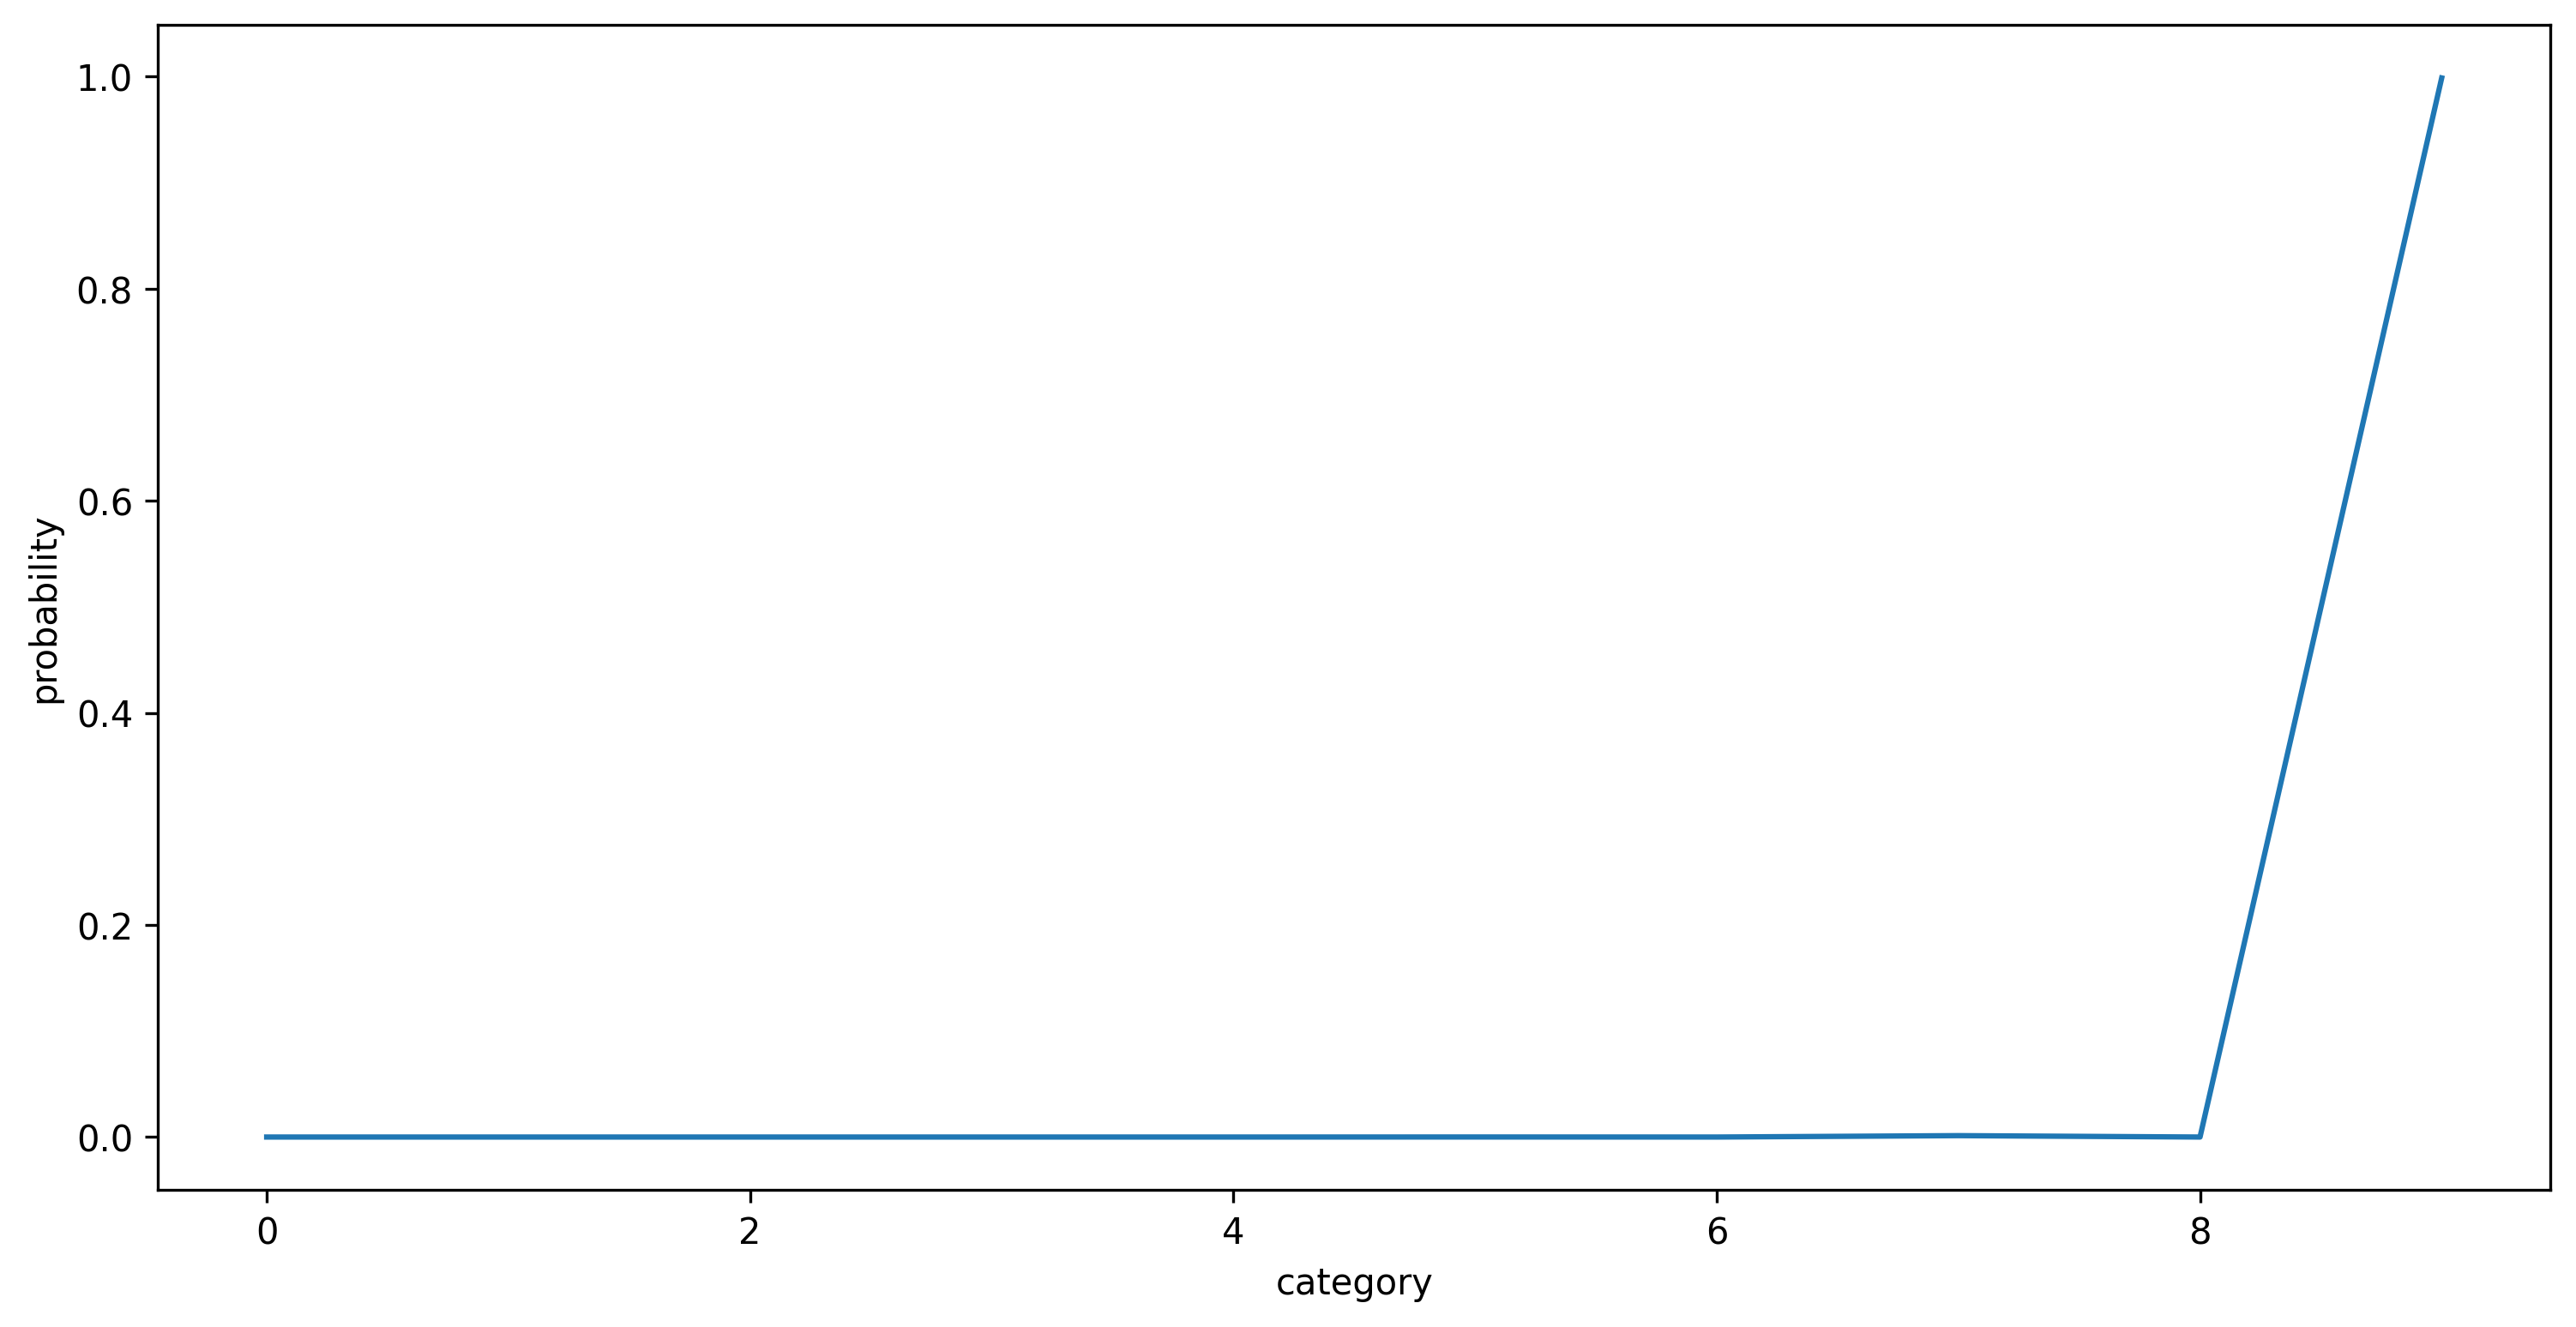

In [12]:
plt.figure(figsize=[12, 6], dpi=300)
sns.lineplot(x=list(range(10)), y=classification[0])
plt.xlabel('category')
plt.ylabel('probability')
plt.show()
